In [ ]:
import pandas as pd
df0 = pd.read_csv("/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/L2-3 IT.csv",header=0)
df0 = df0.loc[[0]]
df0=df0.rename(index={0:"L2-3 IT"})
for cp in cp_list2:
    df=pd.DataFrame()
    df=pd.read_csv(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/{cp}.csv',header=0)
    df = df.loc[[0]]
    df=df.rename(index={0:f'{cp}'})
    df0=pd.concat([df0,df],axis=0,join='inner')

df1 = pd.read_csv("/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/Human/L2-3 IT.csv",header=0)
df1 = df1.loc[[1]]
df1=df1.rename(index={1:"L2-3 IT"})
for cp in cp_list2:
    df=pd.DataFrame()
    df=pd.read_csv(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/Human/{cp}.csv',header=0)
    df = df.loc[[1]]
    df=df.rename(index={1:f'{cp}'})
    df1=pd.concat([df1,df],axis=0,join='inner')
df3 = pd.read_csv("/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/L2-3 IT.csv",header=0)
df3 = df3.loc[[1]]
df3=df3.rename(index={1:"L2-3 IT"})
for cp in cp_list2:
    df=pd.DataFrame()
    df=pd.read_csv(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/{cp}.csv',header=0)
    df = df.loc[[1]]
    df=df.rename(index={1:f'{cp}'})
    df3=pd.concat([df3,df],axis=0,join='inner')

In [ ]:
import matplotlib.pyplot as plt
gene_list=list(df0)
gene_list = [x for x in gene_list  if x != "aa"]
missing_counts = {}  # Dictionary to store missing counts per gene

for gene in gene_list:
    missing_count = 0
    for cp in cp_list:
        if exp[gene][cp] == 0:
            missing_count += 1
    missing_counts[gene] = missing_count

genes_with_zero_missing_counts = []

# Iterate over the dictionary to find genes with zero missing counts
for gene, count in missing_counts.items():
    if count < 1:
        genes_with_zero_missing_counts.append(gene)



In [ ]:

gene_list=list(genes_with_zero_missing_counts)
#gene_list=list(df0)
gene_list = [x for x in gene_list  if x != "aa"]
result = {}
for cp in df0.index:  
    sum_var_exp = 0
    n=0
    for gene in gene_list:  
        exp_value = exp.loc[cp, gene]  
        if exp_value != 0:  
            var_value = df0.loc[cp, gene] 
            sum_var_exp += (var_value / exp_value)
            n += 1      
    result[cp] = sum_var_exp/n 

result_df = pd.DataFrame.from_dict(result, orient='index', columns=['Sum_Var/Exp/n'])

result2 = {}
for cp in df1.index:  
    sum_var_exp = 0 
    n=0
    for gene in gene_list: 
        exp_value = exp.loc[cp, gene]  
        if exp_value != 0:  
            var_value = df1.loc[cp, gene]  
            sum_var_exp += (var_value / exp_value)  
            n += 1
    result2[cp] = sum_var_exp/n  

result_df2 = pd.DataFrame.from_dict(result2, orient='index', columns=['V/Exp/n'])


result = {}
for cp in df3.index: 
    sum_var_exp = 0
    n=0
    for gene in gene_list:  
        exp_value = exp.loc[cp, gene]  
        if exp_value != 0:  
            var_value = df3.loc[cp, gene]  
            sum_var_exp += var_value / exp_value
            n += 1       
    result[cp] = sum_var_exp/n 

result_df3 = pd.DataFrame.from_dict(result, orient='index', columns=['Sam/Exp/n'])

new_df23=pd.concat([result_df, result_df2], axis=1)
new_df23=pd.concat([new_df23, result_df3], axis=1)

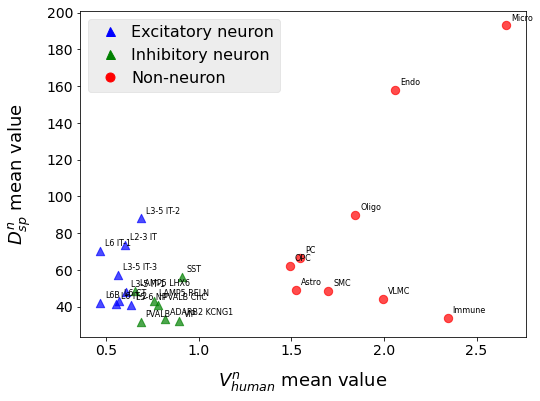

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties

dsp_values = new_df23['Sum_Var/Exp/n']
v_values = new_df23['V/Exp/n']
row_names = new_df23.index



fig, ax = pyplot.subplots(figsize=(8, 6))
for i, txt in enumerate(row_names):
    if txt in ["L2-3 IT", "L3-5 IT-1", "L3-5 IT-2", "L3-5 IT-3", "L5-6 NP", "L6 CT", "L6 IT-1", "L6 IT-2", "L6B"]:
        ax.scatter(v_values[i], dsp_values[i], marker='^',color='blue',s=70,alpha=0.7)
    elif txt in ["LAMP5 LHX6", "LAMP5 RELN", "VIP", "ADARB2 KCNG1", "SST", "PVALB", "PVALB ChC"]:
        ax.scatter(v_values[i], dsp_values[i], marker='^',color='green',s=70,alpha=0.7)
    #elif txt in ["Micro", "Oligo", "Astro"]:
    #    plt.scatter(v_values[i], dsp_values[i], color='red')
    else:
        ax.scatter(v_values[i], dsp_values[i],marker='o', color='red',s=70,alpha=0.7)
    ax.annotate(txt, (v_values[i],dsp_values[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)

exn_patch = pyplot.plot([], [], marker='^', markersize=9, color='blue', linestyle='none')[0]
inn_patch = pyplot.plot([], [], marker='^', markersize=9, color='g', linestyle='none')[0]
non_neuron_patch = pyplot.plot([], [], marker='o', markersize=9, color='red', linestyle='none')[0]
font_props = FontProperties(family='Arial', size=16)
ax.legend([exn_patch, inn_patch, non_neuron_patch], 
            ['Excitatory neuron', 'Inhibitory neuron', 'Non-neuron'], 
            frameon=True,  
            handletextpad=0.3,  
            framealpha=0.4,  
            facecolor='lightgrey',
            prop=font_props,loc='upper left')
#plt.legend(handles=[blue_patch, green_patch, red_patch], loc='upper left')
ax.set_xlabel(r'$V^n_{human}$ mean value', fontsize=18, fontname='Arial',labelpad=13)  # 'V' with superscript 'n'
ax.set_ylabel(r'$D^n_{sp}$ mean value', fontsize=18, fontname='Arial',rotation=90, labelpad=13)
plt.xticks(fontsize=14,fontname='Arial')
plt.yticks(fontsize=14,fontname='Arial')
#plt.savefig(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/fig/mean_exp_12639.png', dpi=300, bbox_inches='tight')
#plt.title('Scatter plot of Dsp vs. V')

plt.show()

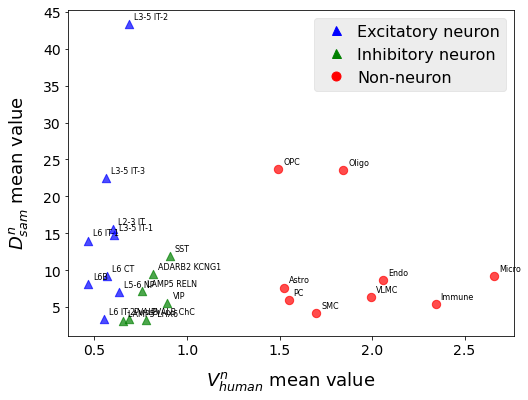

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties

dsp_values = new_df23['Sam/Exp/n']
v_values = new_df23['V/Exp/n']
row_names = new_df23.index


fig, ax = pyplot.subplots(figsize=(8, 6))
for i, txt in enumerate(row_names):
    if txt in ["L2-3 IT", "L3-5 IT-1", "L3-5 IT-2", "L3-5 IT-3", "L5-6 NP", "L6 CT", "L6 IT-1", "L6 IT-2", "L6B"]:
        ax.scatter(v_values[i], dsp_values[i], marker='^',color='blue',s=70,alpha=0.7)
    elif txt in ["LAMP5 LHX6", "LAMP5 RELN", "VIP", "ADARB2 KCNG1", "SST", "PVALB", "PVALB ChC"]:
        ax.scatter(v_values[i], dsp_values[i], marker='^',color='green',s=70,alpha=0.7)
    #elif txt in ["Micro", "Oligo", "Astro"]:
    #    plt.scatter(v_values[i], dsp_values[i], color='red')
    else:
        ax.scatter(v_values[i], dsp_values[i],marker='o', color='red',s=70,alpha=0.7)
    ax.annotate(txt, (v_values[i],dsp_values[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)

exn_patch = pyplot.plot([], [], marker='^', markersize=9, color='blue', linestyle='none')[0]
inn_patch = pyplot.plot([], [], marker='^', markersize=9, color='g', linestyle='none')[0]
non_neuron_patch = pyplot.plot([], [], marker='o', markersize=9, color='red', linestyle='none')[0]
font_props = FontProperties(family='Arial', size=16)
ax.legend([exn_patch, inn_patch, non_neuron_patch], 
            ['Excitatory neuron', 'Inhibitory neuron', 'Non-neuron'], 
            frameon=True,  
            handletextpad=0.3,  
            framealpha=0.4,  
            facecolor='lightgrey',
            prop=font_props,loc='upper right')
#plt.legend(handles=[blue_patch, green_patch, red_patch], loc='upper left')

ax.set_xlabel(r'$V^n_{human}$ mean value', fontsize=18, fontname='Arial',labelpad=13)  # 'V' with superscript 'n'
ax.set_ylabel(r'$D^n_{sam}$ mean value', fontsize=18, fontname='Arial',rotation=90, labelpad=13)
plt.xticks(fontsize=14,fontname='Arial')
plt.yticks(fontsize=14,fontname='Arial')
#plt.savefig(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/fig/mean_exp_sam.png', dpi=300, bbox_inches='tight')
#plt.title('Scatter plot of Dsp vs. V')

plt.show()